#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed( 10 )

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
( x_img_train, y_label_train ), ( x_img_test, y_label_test ) = cifar10.load_data( )

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print( "Train data : ", 'Images : ', x_img_train.shape, ' Labels : ', y_label_train.shape ) 
print( "Test  data : ", 'Images : ', x_img_test.shape , ' Labels : ', y_label_test.shape ) 

Train data :  Images :  (50000, 32, 32, 3)  Labels :  (50000, 1)
Test  data :  Images :  (10000, 32, 32, 3)  Labels :  (10000, 1)


In [0]:
#資料正規化
x_img_train_normalize = x_img_train.astype( 'float32' ) / 255.0
x_img_test_normalize = x_img_test.astype( 'float32' ) / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical( y_label_train )
y_label_test_OneHot = np_utils.to_categorical( y_label_test )

print( 'Test Label data : ', y_label_test_OneHot.shape )

Test Label data :  (10000, 10)


# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

W0707 09:56:44.110180 139893276268416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### 卷積層1與池化層1

In [8]:
model.add( Conv2D( filters = 32, 
                   kernel_size = ( 3, 3 ), 
                   input_shape = ( 32, 32, 3 ), 
                   activation = 'relu', 
                   padding = 'same' 
                   ) )

model.add( Dropout( rate = 0.25 ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )

W0707 09:56:44.164116 139893276268416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 09:56:44.179066 139893276268416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 09:56:44.229145 139893276268416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 09:56:44.242542 139893276268416 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

### 卷積層2與池化層2

In [0]:
model.add( Conv2D( filters = 64, 
                   kernel_size = ( 3, 3 ), 
                   activation = 'relu', 
                   padding = 'same' 
                   ) )

model.add( Dropout( rate = 0.25 ) )
model.add( MaxPooling2D( pool_size = ( 2, 2 ) ) )

### 建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add( Flatten( ) )
model.add( Dropout( rate = 0.25 ) )

In [0]:
model.add( Dense( 1024, activation = 'relu' ) )
model.add( Dropout( rate = 0.25 ) )

In [0]:
model.add( Dense( 10, activation = 'softmax' ) )

### 檢查model 的STACK

In [13]:
print( model.summary( ) )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 訓練模型

#### Loss Function = MSE

In [14]:
model.compile( loss = 'MSE', 
               optimizer = 'sgd', 
               metrics = [ 'accuracy' ] 
               )

W0707 09:56:44.477802 139893276268416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
train_history = model.fit( x = x_img_train_normalize,
                           y = y_label_train_OneHot, 
                           validation_split = 0.25,   # 驗證集佔訓練集的比例
                           epochs = 12,               # 模擬次數
                           batch_size = 128,          # 每批次的資料筆數
                           verbose = 1                # 顯示模型訓練進度 
                           )

W0707 09:56:44.960925 139893276268416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0904 - acc: 0.1085 - val_loss: 0.0898 - val_acc: 0.1318
Epoch 2/12
37500/37500 [==============================] - 116s 3ms/step - loss: 0.0901 - acc: 0.1086 - val_loss: 0.0897 - val_acc: 0.1395
Epoch 3/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.0899 - acc: 0.1182 - val_loss: 0.0897 - val_acc: 0.1427
Epoch 4/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0898 - acc: 0.1220 - val_loss: 0.0896 - val_acc: 0.1502
Epoch 5/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0897 - acc: 0.1262 - val_loss: 0.0895 - val_acc: 0.1574
Epoch 6/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0896 - acc: 0.1322 - val_loss: 0.0895 - val_acc: 0.1663
Epoch 7/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.0895 - acc: 0.1392 - val_loss: 0.0894 - 

In [16]:
scores = model.evaluate( x_img_test_normalize, y_label_test_OneHot )

print( 'accuracy = ', scores[1] )

10000/10000 [==============================] - 7s 734us/step
accuracy =  0.2029


#### 以圖形顯示訓練過程

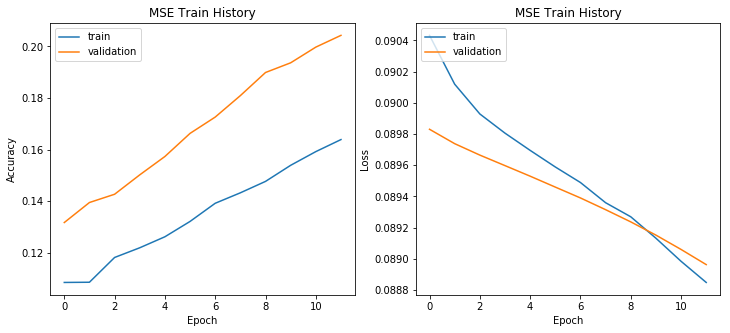

In [17]:
import matplotlib.pyplot as plt
from keras.utils import plot_model
from IPython.display import Image

def show_train_history( train_history ) : 
        fig = plt.gcf( )
        fig.set_size_inches( 12, 5 )
        
        plt.subplot( 121 )
        plt.plot( train_history.history[ 'acc' ] )
        plt.plot( train_history.history[ 'val_acc' ] )
        plt.title( 'MSE Train History' )
        plt.xlabel( 'Epoch' )
        plt.ylabel( 'Accuracy' )
        plt.legend( [ 'train', 'validation' ], loc = 'upper left' )
        
        plt.subplot( 122 )
        plt.plot( train_history.history[ 'loss' ] )
        plt.plot( train_history.history[ 'val_loss' ] )
        plt.title( 'MSE Train History' )
        plt.xlabel( 'Epoch' )
        plt.ylabel( 'Loss' )
        plt.legend( [ 'train', 'validation' ], loc = 'upper left' )
        
        plt.show( )
        
        

show_train_history( train_history )

#### Loss Function = binary_crossentropy

In [18]:
model.compile( loss = 'binary_crossentropy', 
               optimizer = 'sgd', 
               metrics = [ 'accuracy' ] 
               )

W0707 10:20:25.175120 139893276268416 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
train_history = model.fit( x = x_img_train_normalize,
                           y = y_label_train_OneHot, 
                           validation_split = 0.25,   # 驗證集佔訓練集的比例
                           epochs = 12,               # 模擬次數
                           batch_size = 128,          # 每批次的資料筆數
                           verbose = 1                # 顯示模型訓練進度 
                           )

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 118s 3ms/step - loss: 0.3172 - acc: 0.9000 - val_loss: 0.3167 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.3129 - acc: 0.9000 - val_loss: 0.3129 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 116s 3ms/step - loss: 0.3074 - acc: 0.9000 - val_loss: 0.3081 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.3017 - acc: 0.9001 - val_loss: 0.3037 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2970 - acc: 0.9002 - val_loss: 0.2994 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 116s 3ms/step - loss: 0.2935 - acc: 0.9004 - val_loss: 0.2966 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.2909 - acc: 0.9005 - val_loss: 0.2940 - 

#### 以圖形顯示訓練過程

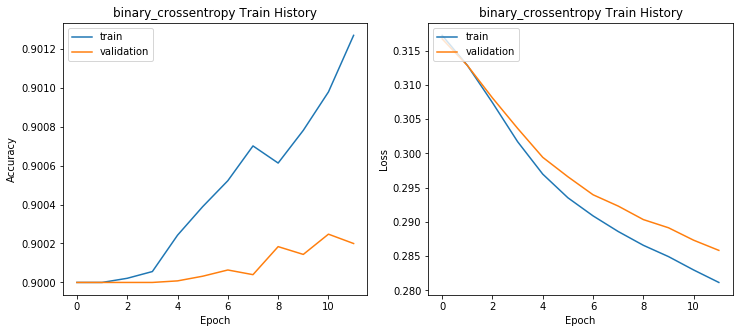

In [20]:
def show_train_history( train_history ) : 
        fig = plt.gcf( )
        fig.set_size_inches( 12, 5 )
        
        plt.subplot( 121 )
        plt.plot( train_history.history[ 'acc' ] )
        plt.plot( train_history.history[ 'val_acc' ] )
        plt.title( 'binary_crossentropy Train History' )
        plt.xlabel( 'Epoch' )
        plt.ylabel( 'Accuracy' )
        plt.legend( [ 'train', 'validation' ], loc = 'upper left' )
        
        plt.subplot( 122 )
        plt.plot( train_history.history[ 'loss' ] )
        plt.plot( train_history.history[ 'val_loss' ] )
        plt.title( 'binary_crossentropy Train History' )
        plt.xlabel( 'Epoch' )
        plt.ylabel( 'Loss' )
        plt.legend( [ 'train', 'validation' ], loc = 'upper left' )
        
        plt.show( )
        
        

show_train_history( train_history )